# Feature Selection -  Dropping constant features

removing features which has constant values which are not important for solving the problem statement 

In [2]:
import pandas as pd
data = pd.DataFrame({
    "A" : [1,2,4,1,2,4],
    "B" : [4,5,6,7,8,9],
    "C": [0,0,0,0,0,0],
    "D" : [1,1,1,1,1,1]
})


In [3]:
data.head()

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1


# Variance Threshold

feature selector that removes all low - variance features


In [4]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(data)
#it will remove the column whose variance is zero

VarianceThreshold(threshold=0)

In [8]:
var_thres.get_support()

array([ True,  True, False, False])

In [7]:
cons_column = [col for col in data.columns if col not in data.columns[var_thres.get_support()]]

In [9]:
for feature in cons_column:
    print(feature)

C
D


In [10]:
data.drop(cons_column, axis=1)

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8
5,4,9


# SANTANDER CUSTOMER SATISFACTION DATASET

In [15]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
data = pd.read_csv('train.csv', nrows=10000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [16]:
data.shape

(10000, 371)

In [17]:
X = data.drop(['TARGET'], axis=1)
y = data['TARGET']

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)
xtrain.shape

(7000, 370)

# Applying the variance threshold technique

In [25]:
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(xtrain)

VarianceThreshold(threshold=0)

In [26]:
sum(var_thres.get_support())

284

In [27]:
#84 features are constant or duplicated

In [29]:
cons_column = [col for col in xtrain.columns if col not in xtrain.columns[var_thres.get_support()]]

In [30]:
xtrain = xtrain.drop(cons_column, axis=1)

# 2 Feature selection with the help of Pearson correlation

removing features which are highly correlated

In [31]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [33]:
#load the dataset
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["MEDV"] = data.target

In [34]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [35]:
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)


In [37]:
xtrain.shape

(354, 13)

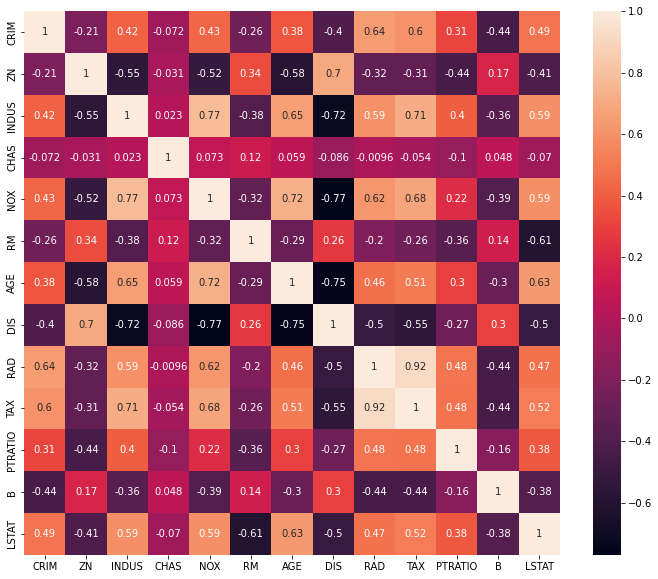

In [38]:
import seaborn as sns
plt.figure(figsize=(12,10))
#pearson correlation ranges between (-1, 1)
corr = xtrain.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [41]:
#function to select highly correlated features
#it will remove first feature which is correlated with any other feature

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [50]:
corr_features = correlation(xtrain, 0.7)
len(set(corr_features))

4

In [51]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [52]:
xtrain.drop(corr_features, axis=1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
13,0.62976,0.0,8.14,0.0,5.949,4.0,21.0,396.90,8.26
61,0.17171,25.0,5.13,0.0,5.966,8.0,19.7,378.08,14.44
377,9.82349,0.0,18.10,0.0,6.794,24.0,20.2,396.90,21.24
39,0.02763,75.0,2.95,0.0,6.595,3.0,18.3,395.63,4.32
365,4.55587,0.0,18.10,0.0,3.561,24.0,20.2,354.70,7.12
...,...,...,...,...,...,...,...,...,...
255,0.03548,80.0,3.64,0.0,5.876,1.0,16.4,395.18,9.25
72,0.09164,0.0,10.81,0.0,6.065,4.0,19.2,390.91,5.52
396,5.87205,0.0,18.10,0.0,6.405,24.0,20.2,396.90,19.37
235,0.33045,0.0,6.20,0.0,6.086,8.0,17.4,376.75,10.88


# Information gain - Mutual information in classification problem statements
entropy


In [53]:
import pandas as pd
data = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [55]:
data['Wine'].nunique()

3

In [56]:
data.dtypes

Wine                      int64
Alcohol                 float64
Malic.acid              float64
Ash                     float64
Acl                     float64
Mg                        int64
Phenols                 float64
Flavanoids              float64
Nonflavanoid.phenols    float64
Proanth                 float64
Color.int               float64
Hue                     float64
OD                      float64
Proline                   int64
dtype: object

In [59]:
# train test split --> to avoid overfitting
xtrain, xtest, ytrain, ytest = train_test_split(data.drop(['Wine'], axis=1), data['Wine'], test_size=0.3, random_state=0)
xtrain.shape

(124, 13)

In [60]:
xtrain.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


In [61]:
from sklearn.feature_selection import mutual_info_classif
#determine the mutual information
mutual_info = mutual_info_classif(xtrain, ytrain)
mutual_info

array([0.41400058, 0.30027609, 0.162586  , 0.27500698, 0.18435339,
       0.47223948, 0.71537961, 0.1440066 , 0.26053409, 0.61160999,
       0.55355665, 0.55295929, 0.53942063])

In [63]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = xtrain.columns
mutual_info.sort_values(ascending=False)
#having high value is the most important feature

Flavanoids              0.715380
Color.int               0.611610
Hue                     0.553557
OD                      0.552959
Proline                 0.539421
Phenols                 0.472239
Alcohol                 0.414001
Malic.acid              0.300276
Acl                     0.275007
Proanth                 0.260534
Mg                      0.184353
Ash                     0.162586
Nonflavanoid.phenols    0.144007
dtype: float64

In [65]:
#selecting th 
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(xtrain.fillna(0), ytrain)
xtrain.columns[sel_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

# Information gain - Mutual information in Regression problem statements
entropy

In [66]:
data = pd.read_csv('housing_price.csv')

In [67]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [69]:
numeric_list = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(data.select_dtypes(include=numeric_list).columns)

In [70]:
data = data[numerical_cols]

In [71]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [73]:
data = data.drop('Id', axis=1)

In [74]:
xtrain, xtest, ytrain, ytest = train_test_split(data.drop(['SalePrice'], axis=1), data['SalePrice'], test_size=0.3, random_state=0)

In [76]:
xtrain.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,60,NaN,9375,7,5,1997,1998,573.0,739,0,...,645,576,36,0,0,0,0,0,2,2009
682,120,NaN,2887,6,5,1996,1997,0.0,1003,0,...,431,307,0,0,0,0,0,0,11,2008
960,20,50.0,7207,5,7,1958,2008,0.0,696,0,...,0,117,0,0,0,0,0,0,2,2010
1384,50,60.0,9060,6,5,1939,1950,0.0,204,0,...,280,0,0,0,0,0,0,0,10,2009
1100,30,60.0,8400,2,5,1920,1950,0.0,290,0,...,246,0,0,0,0,0,0,0,1,2009


In [79]:
xtrain.isnull().sum()

MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [80]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(xtrain.fillna(0), ytrain)

In [81]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = xtrain.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.517035
GrLivArea        0.483602
TotalBsmtSF      0.384709
GarageArea       0.370375
GarageCars       0.366068
YearBuilt        0.350244
1stFlrSF         0.310587
FullBath         0.269552
GarageYrBlt      0.267735
MSSubClass       0.250464
YearRemodAdd     0.246399
2ndFlrSF         0.231279
LotFrontage      0.211400
TotRmsAbvGrd     0.184483
Fireplaces       0.180178
OpenPorchSF      0.170044
LotArea          0.163391
BsmtFinSF1       0.156844
BsmtUnfSF        0.114763
MasVnrArea       0.097882
OverallCond      0.096633
WoodDeckSF       0.082564
HalfBath         0.079272
BedroomAbvGr     0.036919
BsmtFullBath     0.027138
ScreenPorch      0.020744
EnclosedPorch    0.006954
BsmtFinSF2       0.006204
LowQualFinSF     0.005277
3SsnPorch        0.001047
PoolArea         0.000796
YrSold           0.000010
BsmtHalfBath     0.000000
KitchenAbvGr     0.000000
MiscVal          0.000000
MoSold           0.000000
dtype: float64

#  CHI-Square test feature selection

In [83]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [85]:
# ['sex','embarked', 'alone', 'pclass', 'Survived']
df = df[['sex','embarked', 'alone', 'pclass', 'survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [86]:
# label encoding
import numpy as np
df['sex'] = np.where(df['sex']=='male',1,0) 

/var/folders/s8/ry4t0lwd27d51g6ly2d7zhtr0000gn/T/ipykernel_1508/2665754158.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = np.where(df['sex']=='male',1,0)


In [87]:
ordinal_label = {k: i for i,k in enumerate(df['embarked'].unique(), 0)}
df['embarked'] = df['embarked'].map(ordinal_label)

/var/folders/s8/ry4t0lwd27d51g6ly2d7zhtr0000gn/T/ipykernel_1508/180696928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embarked'] = df['embarked'].map(ordinal_label)


In [89]:
df['alone'] = np.where(df['alone']==True,1,0)

/var/folders/s8/ry4t0lwd27d51g6ly2d7zhtr0000gn/T/ipykernel_1508/1503327378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['alone'] = np.where(df['alone']==True,1,0)


In [90]:
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


In [92]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop(['survived'], axis=1), df['survived'], test_size=0.3)

In [93]:
xtrain.head()

,sex,embarked,alone,pclass
869,1,0,0,3
475,1,0,1,1
379,1,0,1,3
865,0,0,1,2
282,1,0,1,3


In [94]:
xtrain.isnull().sum()

sex         0
embarked    0
alone       0
pclass      0
dtype: int64

In [96]:
#chi2 returns two values 
# fscore and p value
from sklearn.feature_selection import chi2
f_p_values = chi2(xtrain, ytrain)

In [97]:
f_p_values

(array([59.07509477,  5.44112271, 11.85381283, 18.43473496]),
 array([1.51768033e-14, 1.96680235e-02, 5.75434076e-04, 1.75823619e-05]))